In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from cabm import post_processing as ppr

In [2]:
# Figure setup
# Set the font to Courier
mpl.rcParams['font.family'] = 'Courier'

# Set the line weight to thin
mpl.rcParams['lines.linewidth'] = 0.75

# Set the color scheme to black and white
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['axes.edgecolor'] = 'black'

In [3]:
agent_df = pd.read_pickle('agent_output_ads_affect_sales.pkl')

In [4]:
agent_df = ppr.add_date_column(agent_df)

In [5]:
data_A = ppr.calculate_total_purchases(agent_df, ['price_A','tv_A','web_A', 'price_B', 'tv_B', 'web_B'], ['Total_Purchases_A', 'Total_Purchases_B'])

In [6]:
data_A = ppr.add_total_sales_columns(data_A, ['Total_Purchases_A', 'Total_Purchases_B'],  ['price_A','price_B'],)

In [7]:
data_A = ppr.ensure_float_columns(data_A, exclude_columns=['Date','Step'])

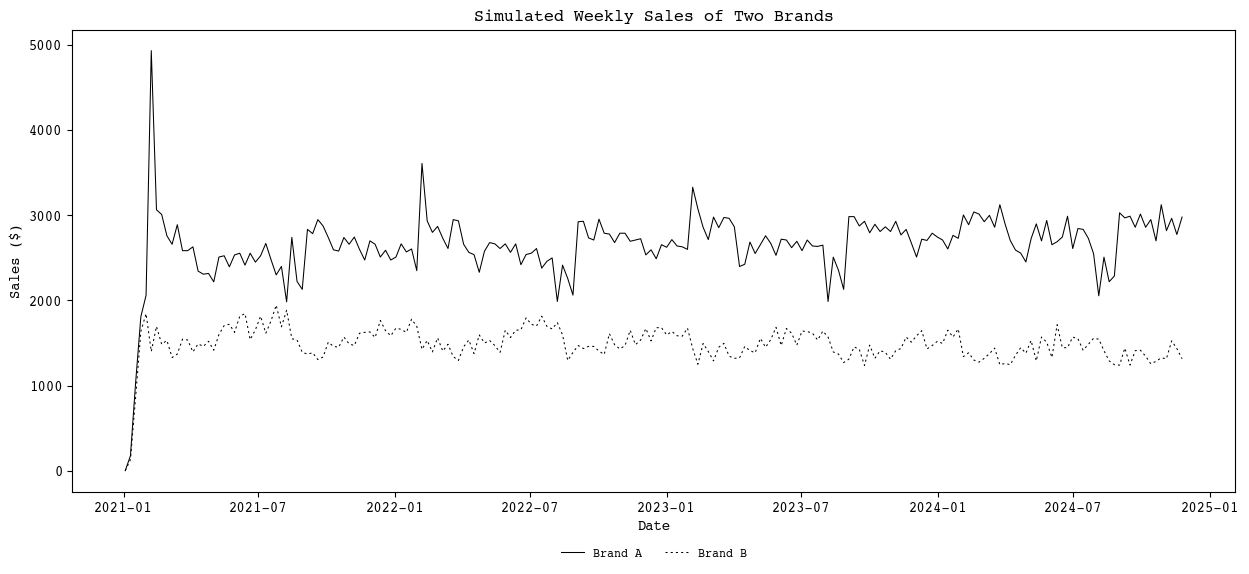

In [8]:
# Create the plot
plt.figure(figsize=(15,6))

plt.plot(data_A['Date'], data_A['Total_Sales_A'], label='Brand A', color='black')
plt.plot(data_A['Date'], data_A['Total_Sales_B'], label='Brand B', color='black', linestyle='--', dashes=[2,3])

plt.title('Simulated Weekly Sales of Two Brands')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)

#plt.savefig("A_elast.png", dpi=200)
plt.show()


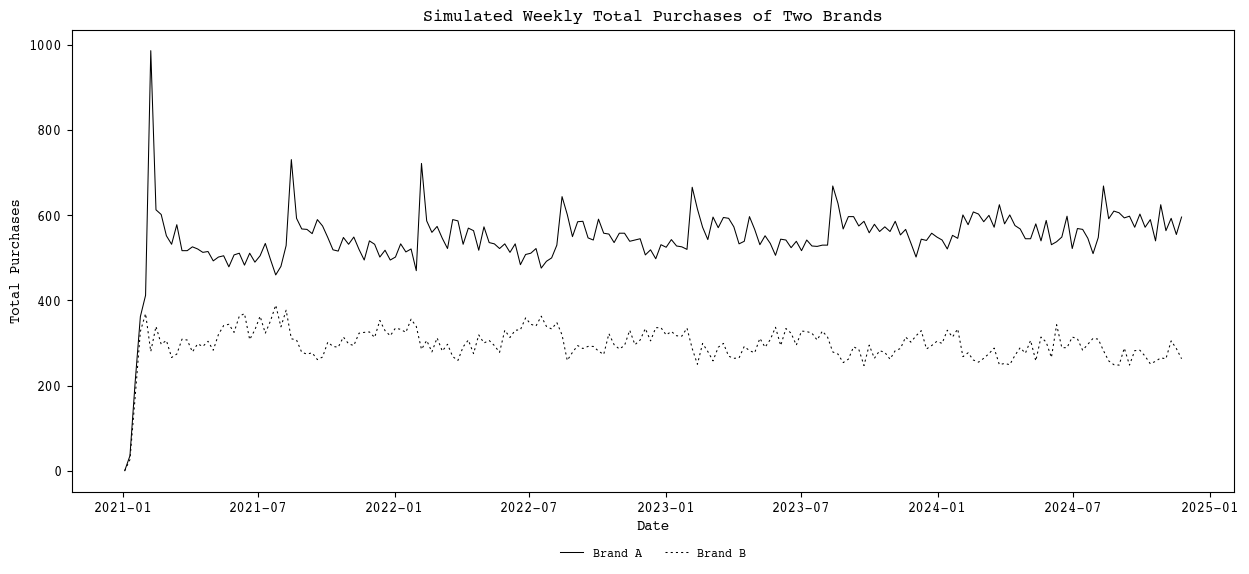

In [9]:
# Create the plot for Total_Purchases
plt.figure(figsize=(15,6))

plt.plot(data_A['Date'], data_A['Total_Purchases_A'], label='Brand A', color='black')
plt.plot(data_A['Date'], data_A['Total_Purchases_B'], label='Brand B', color='black', linestyle='--', dashes=[2,3])

plt.title('Simulated Weekly Total Purchases of Two Brands')
plt.xlabel('Date')
plt.ylabel('Total Purchases')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)

#plt.savefig("Total_Purchases.png", dpi=200)
plt.show()


In [10]:
#data_A.to_pickle('DEMO_NIL.pkl')

In [12]:
agent_df.columns

Index(['Household_Size', 'Consumption_Rate', 'Brand_Preference',
       'Brand_Choice', 'Loyalty_Rate', 'Purchase_Probabilities', 'Enable_Ads',
       'Ad_Decay_Factor', 'Ad_Channel_Preference', 'Adstock', 'Pantry_Min',
       'Pantry_Max', 'Pantry_Stock', 'Purchased_This_Step', 'Current_Price',
       'Last_Product_Price', 'Step_Min', 'Step_Max', 'Baseline_Units',
       'Incremental_Promo_Units', 'Incremental_Ad_Units', 'Decremental_Units',
       'Price_Change', 'price_A', 'tv_A', 'web_A', 'price_B', 'tv_B', 'web_B',
       'Date'],
      dtype='object')

In [15]:
agent_df['Pantry_Stock']

Step  AgentID
0     0          2.000000
      1          4.000000
      2          4.000000
      3          3.000000
      4          2.000000
                   ...   
203   600        6.599448
      875        1.595263
      215       -0.214763
      806        2.216342
      663        0.132217
Name: Pantry_Stock, Length: 204000, dtype: float64

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming agent_df is your DataFrame with pantry_stock values
# Each column represents an agent's pantry stock over time
# Each row represents a time step

# Calculate the average pantry stock over all agents
agent_df['Pantry_Stock'] = agent_df.mean(axis=1)

# Plot the traces of all pantry_stock values
plt.figure(figsize=(15, 6))

for column in agent_df.columns[:-1]:  # Exclude the 'Average_Pantry_Stock' column
    plt.plot(agent_df.index, agent_df[column], color='black', alpha=0.1)  # Fine and semi-transparent lines

# Plot the average pantry stock
plt.plot(agent_df.index, agent_df['Average_Pantry_Stock'], color='black', linewidth=2, label='Average Pantry Stock')  # Bold line

plt.title('Pantry Stock Over Time')
plt.xlabel('Time')
plt.ylabel('Pantry Stock')
plt.legend()
plt.grid(True)
plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'numpy.str_'

In [16]:
agent_df.index

MultiIndex([(  0,   0),
            (  0,   1),
            (  0,   2),
            (  0,   3),
            (  0,   4),
            (  0,   5),
            (  0,   6),
            (  0,   7),
            (  0,   8),
            (  0,   9),
            ...
            (203, 559),
            (203, 275),
            (203, 757),
            (203, 845),
            (203, 749),
            (203, 600),
            (203, 875),
            (203, 215),
            (203, 806),
            (203, 663)],
           names=['Step', 'AgentID'], length=204000)

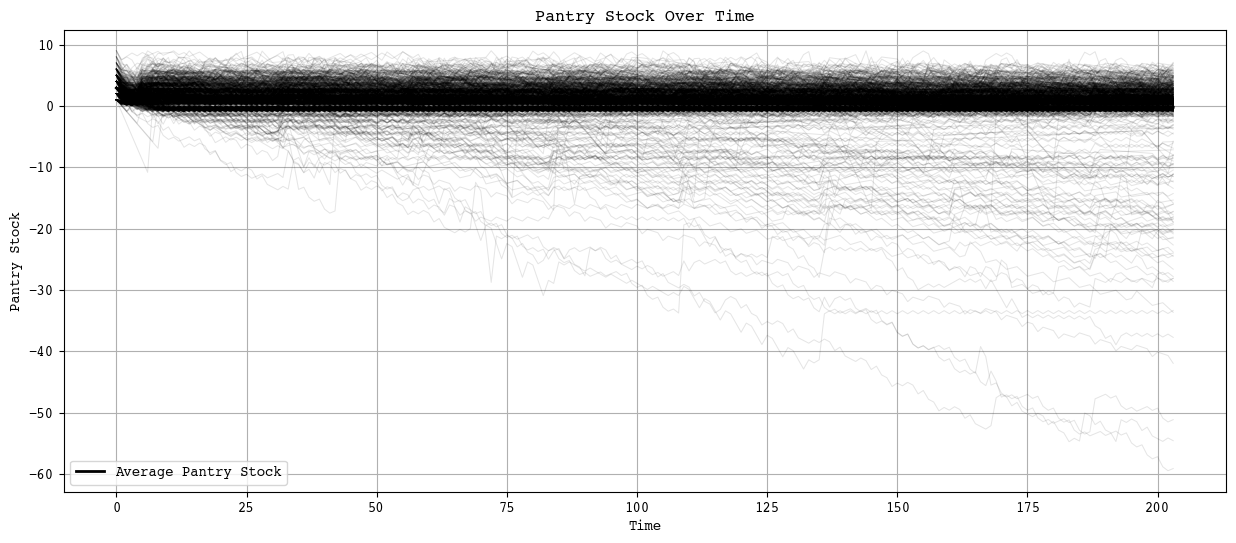

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming agent_df is your DataFrame with pantry_stock values
# Each row represents a time step and each column represents an agent's pantry stock

# Reset the index to make 'Step' a column
agent_df_reset = agent_df.reset_index()

# Pivot the DataFrame to have 'Step' as the index and 'AgentID' as columns
pivot_df = agent_df_reset.pivot(index='Step', columns='AgentID', values='Pantry_Stock')

# Calculate the average pantry stock over all agents
pivot_df['Average_Pantry_Stock'] = pivot_df.mean(axis=1)

# Plot the traces of all pantry_stock values
plt.figure(figsize=(15, 6))

for column in pivot_df.columns[:-1]:  # Exclude the 'Average_Pantry_Stock' column
    plt.plot(pivot_df.index, pivot_df[column], color='black', alpha=0.1)  # Fine and semi-transparent lines

# Plot the average pantry stock
plt.plot(pivot_df.index, pivot_df['Average_Pantry_Stock'], color='black', linewidth=2, label='Average Pantry Stock')  # Bold line

plt.title('Pantry Stock Over Time')
plt.xlabel('Time')
plt.ylabel('Pantry Stock')
plt.legend()
plt.grid(True)
plt.show()

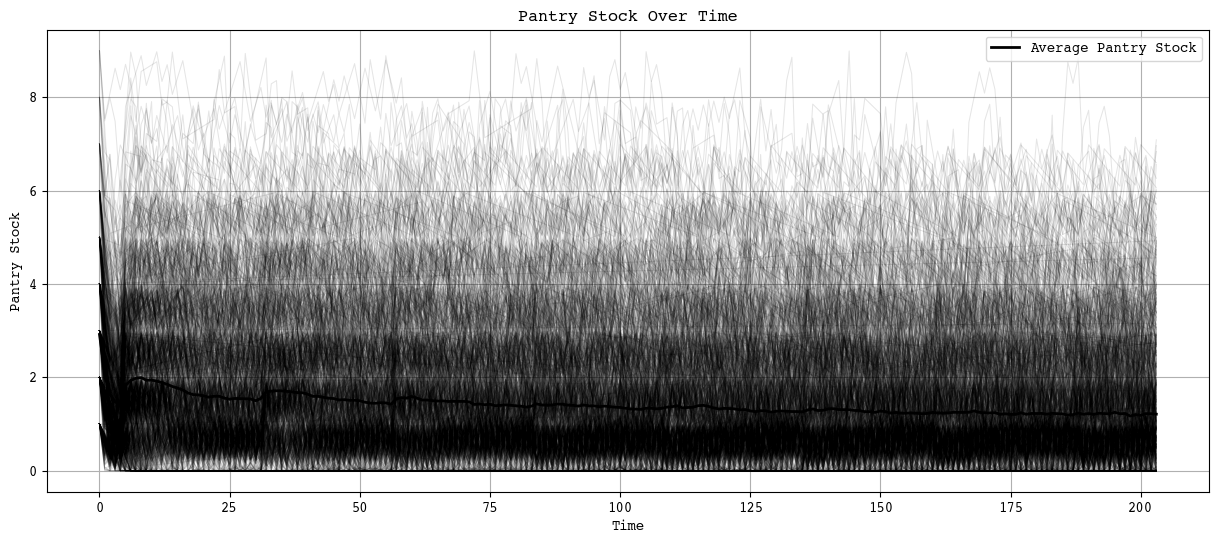

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming agent_df is your DataFrame with pantry_stock values
# Each row represents a time step and each column represents an agent's pantry stock

# Reset the index to make 'Step' a column
agent_df_reset = agent_df.reset_index()

# Pivot the DataFrame to have 'Step' as the index and 'AgentID' as columns
pivot_df = agent_df_reset.pivot(index='Step', columns='AgentID', values='Pantry_Stock')

# Ensure all pantry stock values are non-negative
pivot_df = pivot_df.clip(lower=0)

# Calculate the average pantry stock over all agents
pivot_df['Average_Pantry_Stock'] = pivot_df.mean(axis=1)

# Plot the traces of all pantry_stock values
plt.figure(figsize=(15, 6))

for column in pivot_df.columns[:-1]:  # Exclude the 'Average_Pantry_Stock' column
    plt.plot(pivot_df.index, pivot_df[column], color='black', alpha=0.1)  # Fine and semi-transparent lines

# Plot the average pantry stock
plt.plot(pivot_df.index, pivot_df['Average_Pantry_Stock'], color='black', linewidth=2, label='Average Pantry Stock')  # Bold line

plt.title('Pantry Stock Over Time')
plt.xlabel('Time')
plt.ylabel('Pantry Stock')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import pandas as pd

def get_agent_data(agent_df, agent_number):
    """
    Returns a DataFrame for a specific agent.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    agent_number (int): The agent number to filter by.

    Returns:
    pd.DataFrame: A DataFrame containing data for the specified agent.
    """
    # Filter the DataFrame for the specified agent
    agent_data = agent_df.xs(agent_number, level='AgentID')
    return agent_data

In [26]:
get_agent_data(agent_df,4)['Pantry_Stock']

Step
0      2.000000
1      1.267396
2      0.534793
3      0.802189
4      1.069585
         ...   
199    0.211860
200    0.479256
201    0.746653
202    1.014049
203    0.281445
Name: Pantry_Stock, Length: 204, dtype: float64